### Preamble

In [1]:
import numpy as np
from random import random as rand
import matplotlib.pyplot as plt
from scipy.stats import uniform, expon,\
        bernoulli, cauchy, rayleigh, norm

# Typesetting to latex for matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

### Helper functions

In [7]:
def hist(v, a, b, n, density=False):
    bins  = np.zeros(n, dtype=int)
    dx = (b - a) / n
    N = len(v)


    for i in range(N):
        assert v[i] >= a and v[i] <= b

    for i in range(N):
        j = int(np.floor((v[i] - a) / dx ))
        if (j == n): j = n - 1 # Fixing the problem caused by python indices.
        bins[j] = bins[j] + 1


    if density:
        return bins / max(bins)
    return bins

def bernoulli_rvs(size, p=0.5):
    rvs = np.zeros(size)
    for i in range(size):
        r = rand()
        if r < p:
            rvs[i] = 1.0
        else:
            rvs[i] = 0.0

    return rvs


def shifted_uniform_rvs(size):
    rvs = np.zeros(size)
    for i in range(size):
        r = rand()
        rvs[i] = -1 + 2 * r
    return rvs


def expon_rvs(size, lam=1.0):
    rvs = np.zeros(size)
    for i in range(size):
        r = rand()
        rvs[i] = -1.0 / lam * np.log(1 - r)
    return rvs


def cauchy_rvs(size, sig=1.0):
    rvs = np.zeros(size)
    for i in range(size):
        r = rand()
        rvs[i] = sig * np.tan(np.pi * r)
    return rvs


def rayleigh_rvs(size):
    rvs = np.zeros(size)
    for i in range(size):
        r = rand()
        rvs[i] = np.sqrt(-2.0 * np.log(r))
    return rvs


def box_muller_transform(mu=0.0, sig=1.0):
    u1 = rand()
    u2 = rand()

    r = np.sqrt(-2.0 * np.log(u1))
    t = 2 * np.pi * u2

    return sig * r * np.cos(t) + mu, sig * r * np.sin(t) + mu


def cmp_rvs(sample, xs, pdf, label, filename, xlims=(0,1), ylims=(0,1), bins=10,
        pmf=False, density=True):
    fig, ax = plt.subplots()
    plt.xlim(xlims[0], xlims[1])
    plt.ylim(ylims[0], ylims[1])

    if pmf == False:
        ax.plot(xs, pdf, 'k-', lw=1, label='True pdf')
        ax.hist(sample, bins=bins, density=density, histtype='stepfilled', alpha=0.5,
            range=(xlims[0], xlims[1]), label=label)
    else:
        weights = np.ones_like(sample) / len(sample)
        ax.hist(sample, bins=bins, density=density, weights=weights, histtype='stepfilled', alpha=0.5,
            range=(xlims[0], xlims[1]), label=label)
        ax.vlines(xs, 0, pdf, colors='k', linestyles='-', lw=5,
                label='True pdf')


    ax.set_ylabel(r'$p(x)$')
    ax.set_xlabel(r'$x$')
    ax.set_title('Comparison of theoretical pdf and samples derived from same \
            distribution')
    ax.legend(loc='best', frameon=False)


    fig.tight_layout()
    plt.show()

### Q8

In [8]:
v = norm.rvs(loc=-5, scale=1.0, size=10000)
bins = 50
a, b = min(v), max(v)
my_bins = hist(v, a, b, bins)
np_bins,_ = np.histogram(v, bins=bins, density=False, range=(a, b))

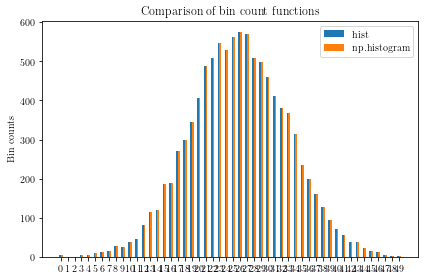

In [9]:
'''
Adapted from https://matplotlib.org/3.1.1/
gallery/lines_bars_and_markers/
barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
'''
n = len(my_bins)
width = 0.25
x = np.arange(n)
fig, ax = plt.subplots()
v_bars = ax.bar(x - width / 2, my_bins, width, label="hist")
w_bars = ax.bar(x + width / 2, np_bins, width, label="np.histogram")

ax.set_ylabel('Bin counts')
ax.set_title('Comparison of bin count functions')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()
plt.show()

### Q9

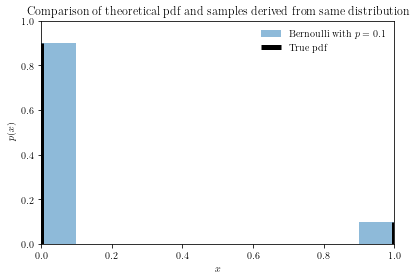

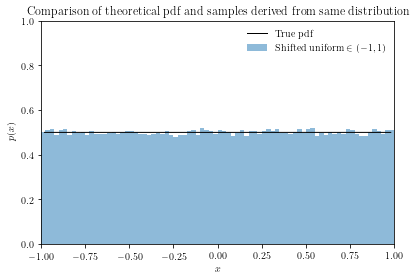

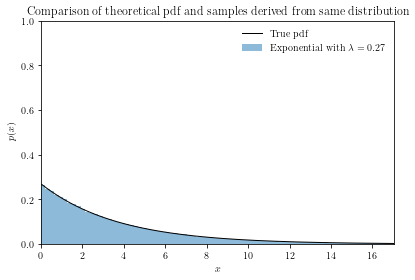

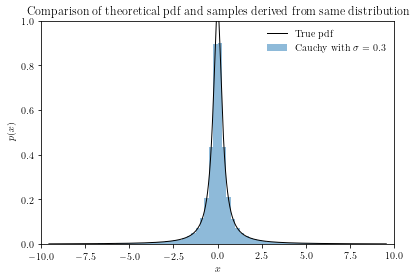

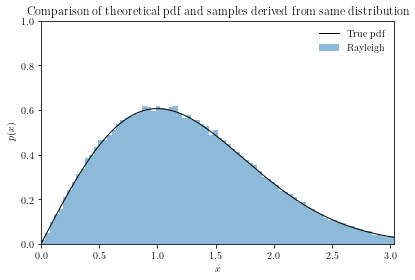

In [14]:
sz = 200000
bins = 80
lam = 0.27
sig = 0.3
p = 0.1


xs = np.linspace(bernoulli.ppf(0.01, p),bernoulli.ppf(0.99, p), sz)
bernoulli_sample = bernoulli_rvs(sz,p=p)
bernoulli_theory = bernoulli.pmf(xs, p)
cmp_rvs(bernoulli_sample, xs, bernoulli_theory,
        r'Bernoulli with $p = {}$'.format(p),"bernoulli",
        pmf=True, density=False, ylims=(0, 1))


xs = np.linspace(uniform.ppf(0.01, loc=-1,
        scale=2), uniform.ppf(0.99, loc=-1, scale=2), sz)
uniform_sample = shifted_uniform_rvs(sz)
uniform_theory = uniform.pdf(xs, loc=-1, scale=2)
cmp_rvs(uniform_sample, xs, uniform_theory, r'Shifted uniform $\in (-1,1)$',
        "shifted_uniform", xlims=(-1,1), ylims=(0, 1.0), bins=bins)

xs = np.linspace(expon.ppf(0.01, scale=1.0/lam), expon.ppf(0.99,scale=1.0/lam), sz)
expon_sample = expon_rvs(sz, lam=lam)
expon_theory = expon.pdf(xs, scale=1.0/lam)
cmp_rvs(expon_sample, xs, expon_theory, r'Exponential with $\lambda = {}$'.format(lam)
        ,"expon",xlims=(0, max(xs)),bins=bins)

xs = np.linspace(cauchy.ppf(0.01, scale=sig), cauchy.ppf(0.99,scale=sig), sz)
cauchy_sample = cauchy_rvs(sz, sig=sig)
cauchy_theory = cauchy.pdf(xs, scale=sig)
cmp_rvs(cauchy_sample, xs, cauchy_theory, r'Cauchy with $\sigma = {}$'.format(sig)
        ,"cauchy",xlims=(-10, 10),bins=bins)

xs = np.linspace(rayleigh.ppf(0.0), rayleigh.ppf(0.99), sz)
rayleigh_sample = rayleigh_rvs(sz)
rayleigh_theory = rayleigh.pdf(xs)
cmp_rvs(rayleigh_sample, xs, rayleigh_theory, 'Rayleigh', "rayleigh",xlims=(0,max(xs)), bins=bins)

### Q10

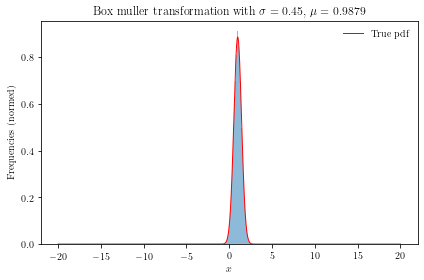

In [11]:
fig, ax = plt.subplots()
mu = 0.9879
sig = 0.45
sz = 50000
bins = 100

xs = np.linspace(-20, 20, sz)
sample = [box_muller_transform(mu=mu, sig=sig)[0] for i in range(sz)]
ax.hist(sample, bins=bins, density=True, histtype='stepfilled', alpha=0.5)
ax.plot(xs, norm.pdf(xs, scale=sig, loc=mu), 'r-', lw=1, label="True pdf")
ax.set_ylabel(r'Frequencies (normed)')
ax.set_xlabel(r'$x$')
ax.set_title(r'Box muller transformation with $\sigma={}$, $\mu={}$'.format(sig,mu))
ax.legend(loc='best', frameon=False)
    
fig.tight_layout()
plt.show()

### Q11

In [12]:
sz = 100000
lam = 0.32784
sample = expon_rvs(sz, lam=lam)
average = 1.0 / np.mean(sample)
print('Estimated mean : {:4f} \nTrue mean : {:4f}'.format(average, lam))

Estimated mean : 0.328224 
True mean : 0.327840


### Q12

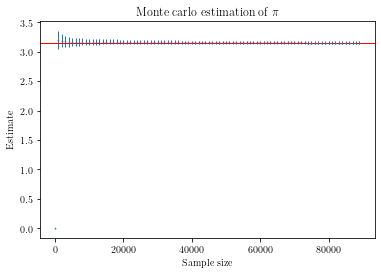

In [13]:
hits = 0
miss = 0
val = 0.0
val2 = 0.0
runs = 90000
step = 1000 # Skipping some values otherwise errorbars become to condensed
est = np.zeros(runs)
dev = np.zeros(runs)
xs = np.arange(runs)

for i in range(runs):
    x = -1 + 2 * rand()
    y = -1 + 2 * rand()
    
    if np.sqrt(x*x + y*y) <= 1.0:
        hits += 1
    else:
        miss += 1

    val += 4.00 * hits / (miss + hits)
    val2 += np.power(4.00 * hits / (miss + hits), 2)
    var = val2 / (i + 1) - np.power(val / (i + 1), 2)
    est[i] = val / (i + 1)
    dev[i] = np.sqrt(var)

fig, ax = plt.subplots()
ax.errorbar(xs[0:runs:step], est[0:runs:step], yerr=dev[0:runs:step], ms=1,fmt='^', lw=1)
ax.axhline(y=np.pi, color='r', linewidth=1)
ax.set_xlabel('Sample size')
ax.set_ylabel('Estimate')
ax.set_title(r'Monte carlo estimation of $\pi$')
plt.show()